In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.evaluation.SilhouetteScore import SilhouetteScore
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans
from interClusLib.metric import *

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         43.786079        80.382894         8.215378        11.602707   
1         40.510572        80.629305        40.844374        46.209791   
2         27.997826        96.949165         4.405889        52.734519   
3         10.757230        24.107652        83.902048        84.256736   
4         26.184967        72.527992         1.891132        58.605331   
5         14.341134        93.296637        47.702393        85.995533   
6         38.311151        81.951206        17.410609        42.664322   
7         48.782992        72.442629        21.628220        72.830415   
8         37.013147        56.159453        41.357332        71.210400   
9          1.798744        69.648882        38.478448        46.478804   
10        17.047692        49.701959         5.430275        93.830

In [2]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(SilhouetteScore.silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[2 0 2 1 0 0 2 0 0 0 3 2 0 1 2 0 0 3 3 0 0 2 0 2 0 0 2 0 0 0]
0.20734574718070736


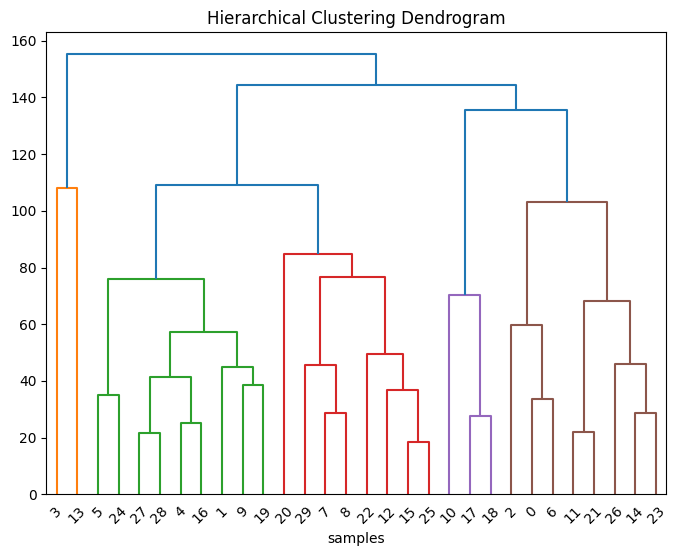

In [3]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.36746036, 0.16819644, 0.23200912, 0.23233408],
       [0.13676334, 0.04404323, 0.37735012, 0.44184331],
       [0.26429978, 0.07549537, 0.33819629, 0.32200857],
       [0.2298592 , 0.28770687, 0.24660816, 0.23582578],
       [0.15998637, 0.0708618 , 0.61631245, 0.15283937],
       [0.10208015, 0.10350307, 0.52165239, 0.27276439],
       [0.29684716, 0.17443025, 0.25923482, 0.26948778],
       [0.12716461, 0.07840318, 0.30918527, 0.48524693],
       [0.17221739, 0.18440857, 0.29983441, 0.34353963],
       [0.19680298, 0.10186113, 0.52128043, 0.18005546],
       [0.09276464, 0.73641938, 0.0989917 , 0.07182427],
       [0.54407608, 0.24218046, 0.12489978, 0.08884368],
       [0.14519667, 0.04004648, 0.19862523, 0.61613162],
       [0.52673664, 0.0969775 , 0.19695461, 0.17933126],
       [0.59947725, 0.09548866, 0.18171061, 0.12332348],
       [0.04766792, 0.01418931, 0.15160043, 0.78654234],
       [0.1964287 , 0.17598447, 0.50149318, 0.12609366],
       [0.01267198, 0.95636756,

In [5]:
model.get_crisp_assignments()

print(SilhouetteScore.silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

0.18138271859203842


In [6]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [7]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)


Neuron (1, 1) has these sample indices => [0, 6, 8, 10, 17, 18]
Neuron (0, 1) has these sample indices => [1, 2, 5, 7, 12, 15, 20, 22, 24, 25, 29]
Neuron (1, 0) has these sample indices => [3, 11, 13, 14, 21, 23, 26]
Neuron (0, 0) has these sample indices => [4, 9, 16, 19, 27, 28]


In [8]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [9]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

Neuron (0, 0) has these sample indices => [0, 2, 6, 7, 8, 13, 20, 29]
Neuron (1, 0) has these sample indices => [1, 4, 5, 12, 15, 22, 24, 25]
Neuron (0, 1) has these sample indices => [3, 10, 11, 17, 18, 21]
Neuron (1, 1) has these sample indices => [9, 14, 16, 19, 23, 26, 27, 28]
